#### MINI PROJECT

Over the course of the past few centuries, technological and medical advancements have helped increase the life expectancy of humans. However, as of now, the average life expectancy of humans varies depending on what country you live in.

In this project, we will investigate a dataset containing information about the average life expectancy in 158 different countries. We will specifically look at how a country’s economic success might impact the life expectancy in that area.

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Loading the data from a csv file into a dataframe 
data = pd.read_csv('../Datasets/country_data.csv')
print(data.head(3))

       Country  Life Expectancy          GDP
0  Afghanistan         58.19375   340.015425
1      Albania         75.15625  2119.726679
2      Algeria         73.61875  2847.853392


In [3]:
#Isolating the Life Expectancy Column and saving it to a variable called life_expectancy
life_expectancy = data['Life Expectancy']

In [7]:
life_expectancy_quartiles = np.quantile(life_expectancy, [0.25, 0.5, 0.75])
print(life_expectancy_quartiles)

[62.325     72.525     75.4421875]


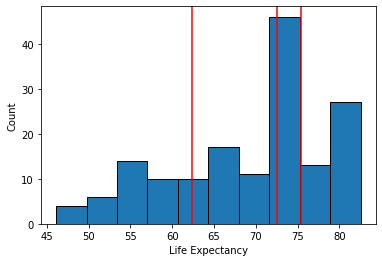

In [9]:
#Plotting a histogram of the life expectancy
plt.hist(life_expectancy, edgecolor = 'black')
for quartile in life_expectancy_quartiles:
    plt.axvline(quartile, color = 'red')
plt.xlabel('Life Expectancy')
plt.ylabel('Count')
plt.show()

Let’s take a moment to think about the meaning of these quartiles. If your country has a life expectancy of 70 years, does that fall in the first, second, third, or final quarter of the data?

70 is between the first and second quartile, so it falls in the second quarter of the data.

GDP is a mesaure of a country’s wealth. Let’s now use the GDP data to see if life expectancy is affected by this value.

Let’s split the data into two groups based on GDP. If we find the median GDP, we can create two datasets for “low GDP countries” and “high GDP countries.

To start, let’s isolate the GDP column and store it in a variable named gdp.

In [10]:
#Isolating the GDP column and storing it as GDP
gdp = data['GDP']

#Finding the median of the GDP
median_gdp = np.quantile(gdp, 0.5)
print(median_gdp)

2938.0781152500003


In [11]:
#Grabbing all rows from the dataset that have GDP values less than the median and storing it as low_gdp
low_gdp = data[data['GDP'] <= median_gdp]


#Grabbing all rows from the dataset that have GDP values higher than the median and storing it as high_gdp
high_gdp = data[data['GDP'] > median_gdp]

In [12]:
#Grabbing all rows from the dataset that have GDP values less than the median and storing it as low_gdp
low_gdp = data[data['GDP'] <= median_gdp]

#Grabbing all rows from the dataset that have GDP values higher than the median and storing it as high_gdp
high_gdp = data[data['GDP'] > median_gdp]


Now that we’ve split the data based on the GDP, let’s see how the life expectancy of each group compares to each other. 

In [13]:
low_gdp_quartiles = np.quantile(low_gdp['Life Expectancy'], [0.25, 0.5, 0.75])
print(low_gdp_quartiles)


high_gdp_quartiles = np.quantile(high_gdp['Life Expectancy'], [0.25, 0.5, 0.75])
print(low_gdp_quartiles)

[56.3375  64.34375 71.7375 ]
[56.3375  64.34375 71.7375 ]


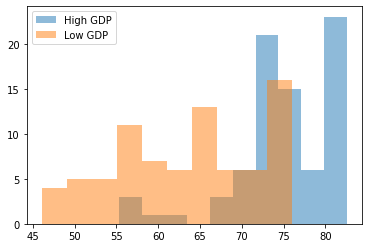

In [14]:
plt.hist(high_gdp["Life Expectancy"], alpha = 0.5, label = "High GDP")
plt.hist(low_gdp["Life Expectancy"], alpha = 0.5, label = "Low GDP")
plt.legend()
plt.show()

Once again, consider a country that has a life expectancy of 70 years. If that country is in the top half of GDP countries, is it in the first, second, third, or fourth quarter of the data with respect to life expectancy? What if the country is in the bottom half of GDP countries?

70 is below the first quartile of the high GDP dataset, so it falls in the first quarter of that dataset. 70 is between the second and third quartile of the low GDP dataset, so it falls in the third quarter.